<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-2-Regression/blob/master/module3-regression-diagnostics/regression-diagnostics-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', 500)
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)
df2 = df.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df['YearBuilt'].isna().sum()

0

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

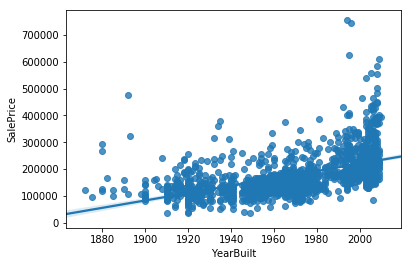

In [4]:
##### Your Code Here #####
feature = 'YearBuilt' 
target =  'SalePrice'

sns.regplot(df[feature], df[target])

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [5]:
##### Your Code Here #####
columns = ['LotArea','GrLivArea','OverallQual','YearBuilt','TotRmsAbvGrd','GarageArea','SalePrice']

#Locat the specific columns and save it to the df
df = df.loc[:,columns]

feature = columns[:-1]
target = 'SalePrice'

X = df[feature]
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     773.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:37:49   Log-Likelihood:                -17497.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.505e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.448e+05   8.39e+04    -10.067   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
##### Your Code Here #####

#Null hyp = t is 0
#Alt hyp = t is NOT 0
#If p-value is less than 0.5 then the the coefficients are significant and we reject the null.
     # Also says that the coefficients affects the target variable

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [7]:
##### Your Code Here #####
print(df.shape)
df = df[(np.abs(stats.zscore(df)) <3).all(axis=1)]
print(df.shape)

(1460, 7)
(1400, 7)


In [8]:
X = df[feature] 
y = df[target]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1001.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:37:49   Log-Likelihood:                -16349.
No. Observations:                1400   AIC:                         3.271e+04
Df Residuals:                    1393   BIC:                         3.275e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.819e+05   6.54e+04    -13.477   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [0]:
##### Your Code Here #####
df['ln_SalePrice'] = np.log(df['SalePrice'])
df = df.drop(columns='SalePrice')

## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [10]:
##### Your Code Here #####
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           7323.840549
LotArea            1.181745
GrLivArea          4.062447
OverallQual        2.354797
YearBuilt          1.753398
TotRmsAbvGrd       3.091713
GarageArea         1.690293
dtype: float64

In [11]:
#Natural log Sale Price
feature = ['LotArea','GrLivArea','OverallQual','YearBuilt','TotRmsAbvGrd','GarageArea']
target = 'ln_SalePrice'

X = df[feature] 
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

#Standard errors lowered dramatically.
#Coefficients changed
#It should be positive coefficient, however total rooms above ground is negative

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1094.
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:37:49   Log-Likelihood:                 623.17
No. Observations:                1400   AIC:                            -1232.
Df Residuals:                    1393   BIC:                            -1196.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8895      0.356     13.754   

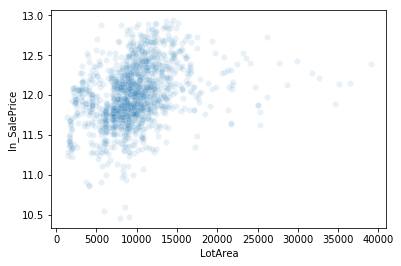

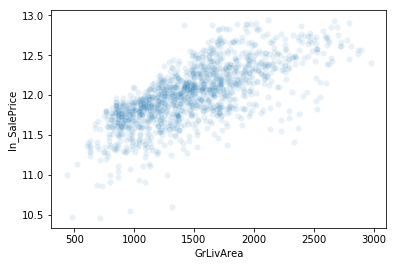

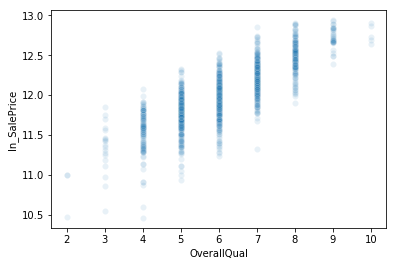

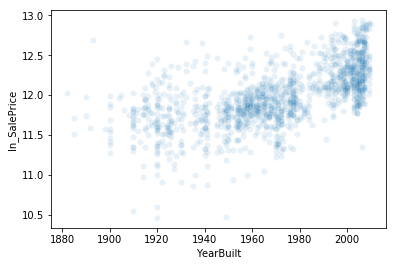

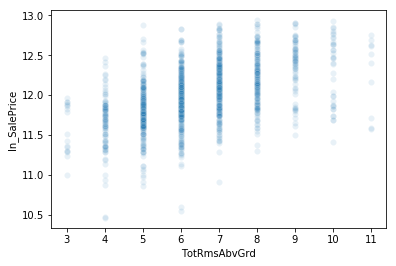

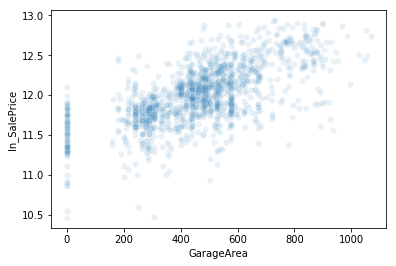

In [12]:
for f in feature:
    sns.scatterplot(x=f, y=target, data=df, alpha=0.1)
    plt.show()

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [13]:
##### Your Code Here #####

df.corr()

,LotArea,GrLivArea,OverallQual,YearBuilt,TotRmsAbvGrd,GarageArea,ln_SalePrice
LotArea,1.000000,0.341291,0.136683,0.039452,0.301963,0.265716,0.346117
GrLivArea,0.341291,1.000000,0.570498,0.234657,0.815922,0.449435,0.701298
OverallQual,0.136683,0.570498,1.000000,0.597354,0.394937,0.550785,0.809426
YearBuilt,0.039452,0.234657,0.597354,1.000000,0.103773,0.493518,0.621551
TotRmsAbvGrd,0.301963,0.815922,0.394937,0.103773,1.000000,0.307406,0.501153
GarageArea,0.265716,0.449435,0.550785,0.493518,0.307406,1.000000,0.650638
ln_SalePrice,0.346117,0.701298,0.809426,0.621551,0.501153,0.650638,1.000000


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [0]:
##### Your Code Here #####

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [15]:
##### Your Code Here #####

feature = ['LotArea','GrLivArea','OverallQual','YearBuilt','TotRmsAbvGrd','GarageArea']
target = 'ln_SalePrice'

X = df[feature] 
y = df[target]

model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

#Std Error lower when correcting for heteroskedasticity

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     886.0
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:37:51   Log-Likelihood:                 623.17
No. Observations:                1400   AIC:                            -1232.
Df Residuals:                    1393   BIC:                            -1196.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8895      0.374     13.085   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

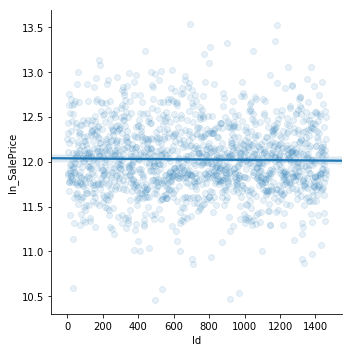

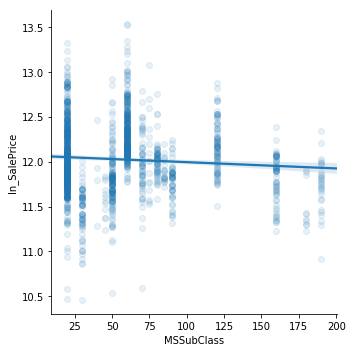

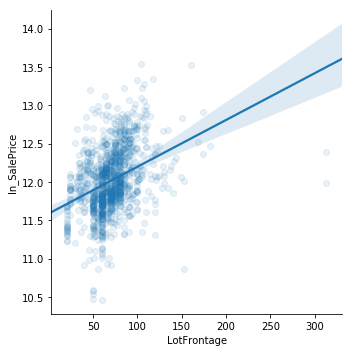

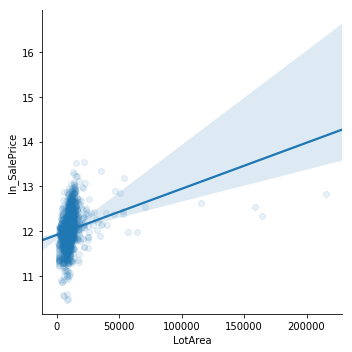

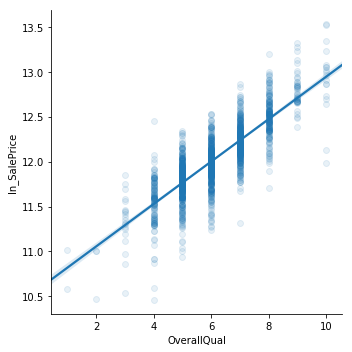

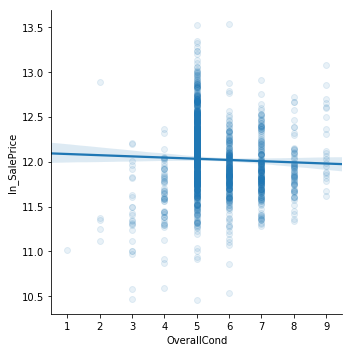

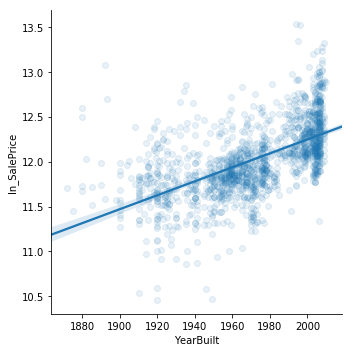

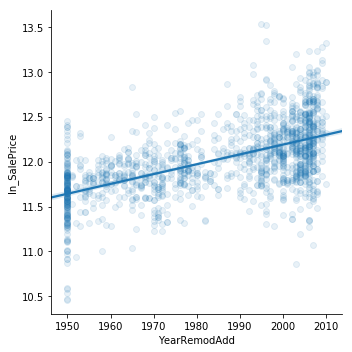

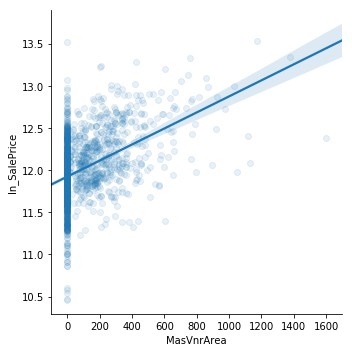

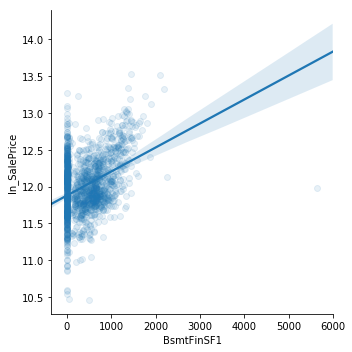

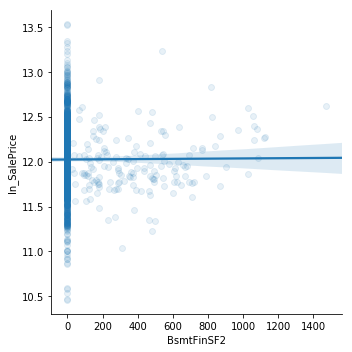

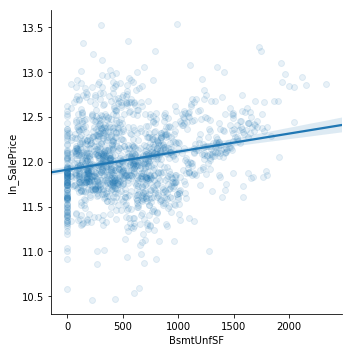

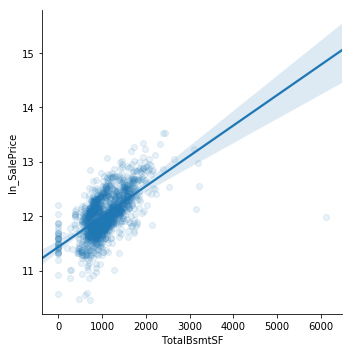

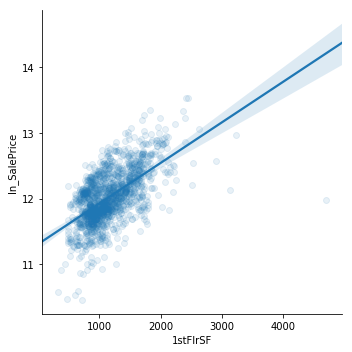

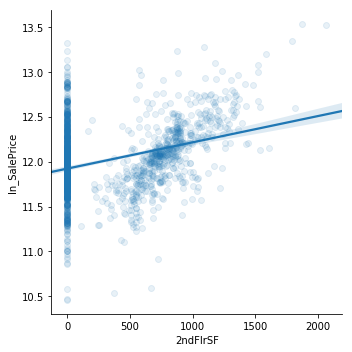

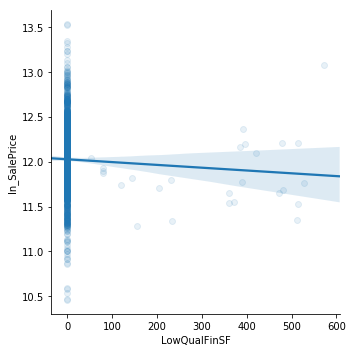

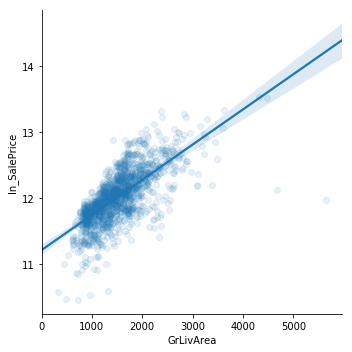

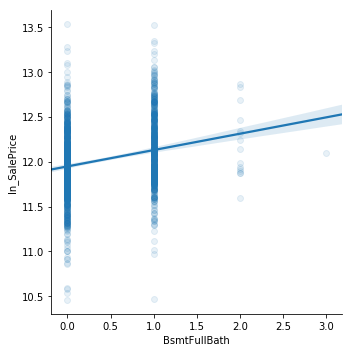

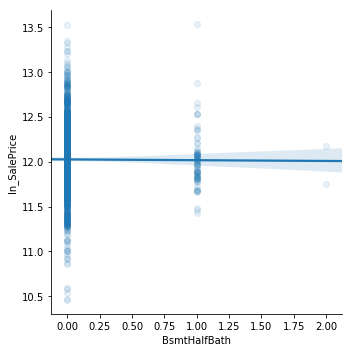

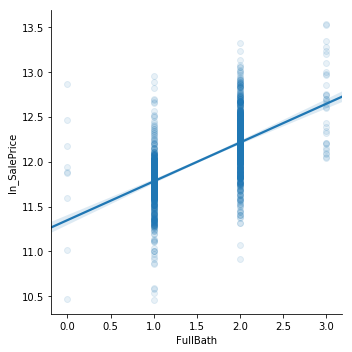

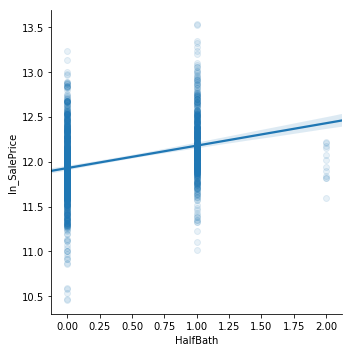

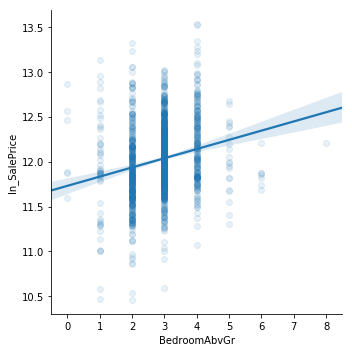

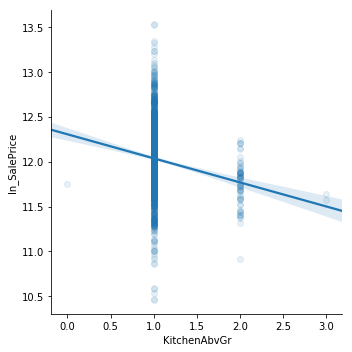

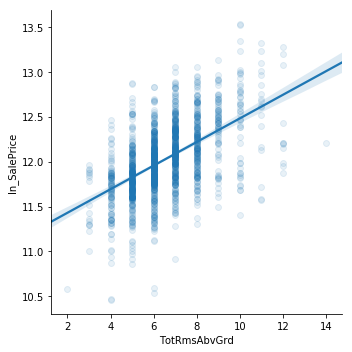

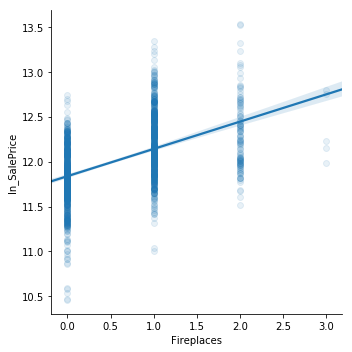

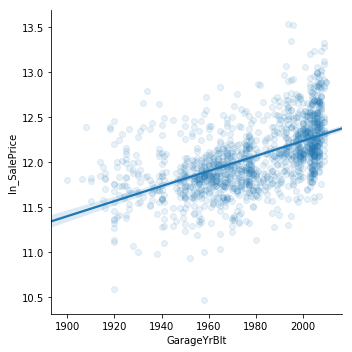

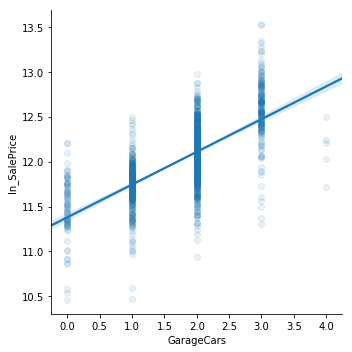

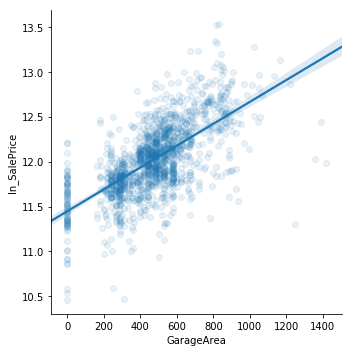

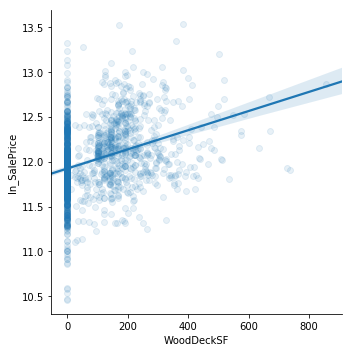

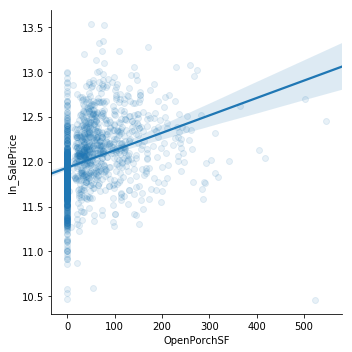

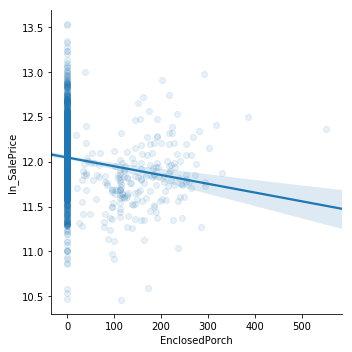

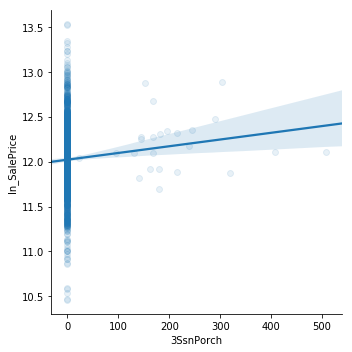

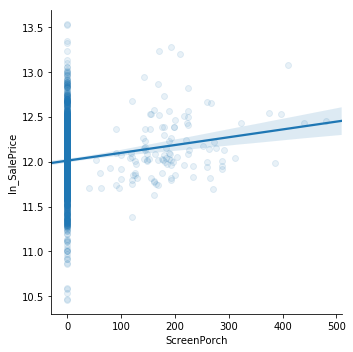

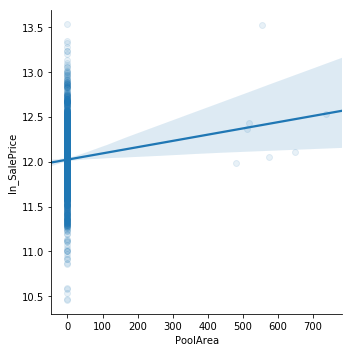

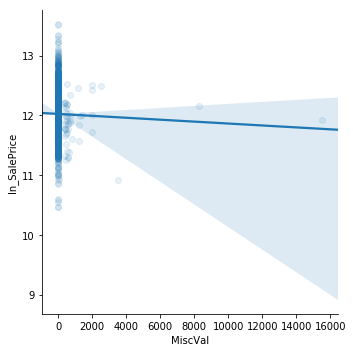

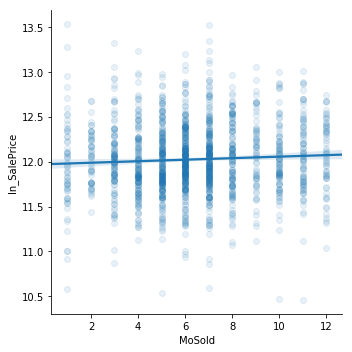

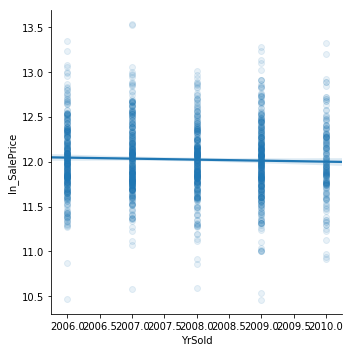

In [16]:
##### Your Code Here #####
df2 = df2.select_dtypes(include=[int, float])
df2['ln_SalePrice'] = np.log(df2['SalePrice'])

feature = df2.columns.drop(['SalePrice',target])
target = 'ln_SalePrice'

for f in feature:
  sns.lmplot(x=f, y=target, data=df2, scatter_kws=dict(alpha=0.1))
  plt.show()
  
#Polynomial - Eyeball graphs
#GarageArea, Garage Cars, GarageYrBlt, Fireplaces, TotRmsAbvGrd, GrLivArea,
# 1stFlrSF, TotalBsmtSF, YearRemodAdd, YearBuilt

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

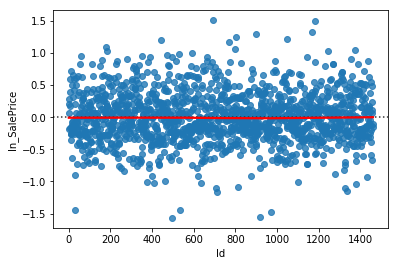

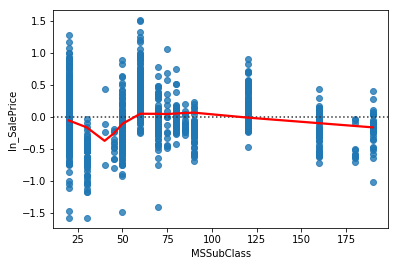

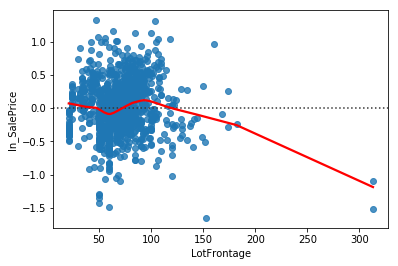

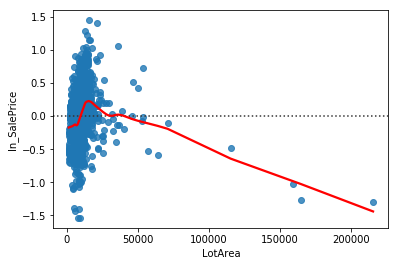

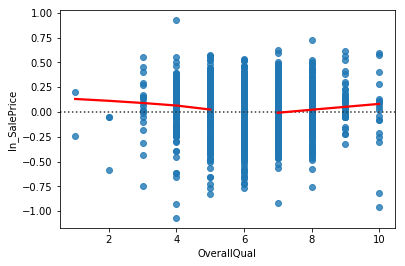

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


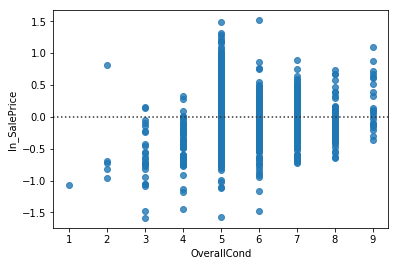

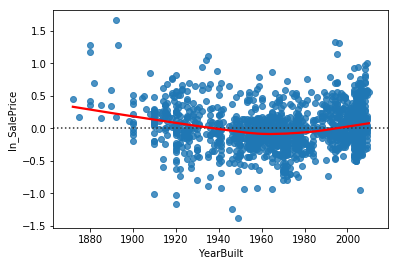

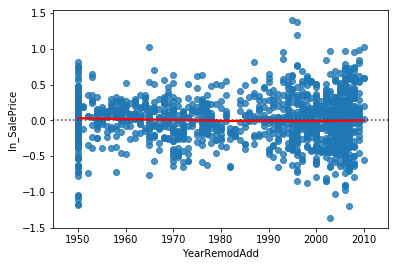

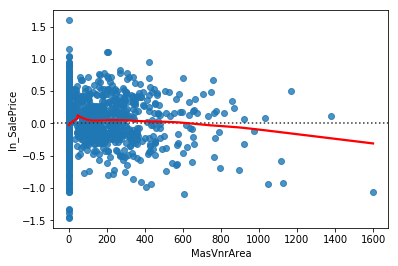

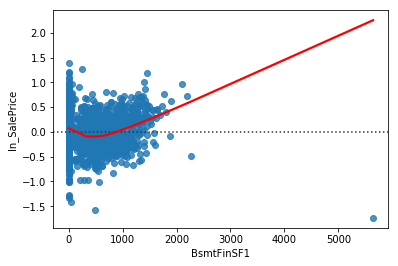

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


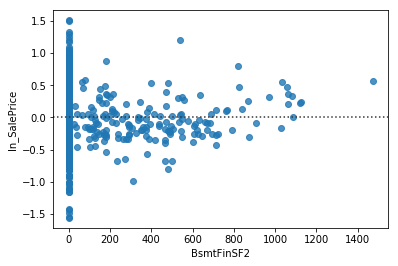

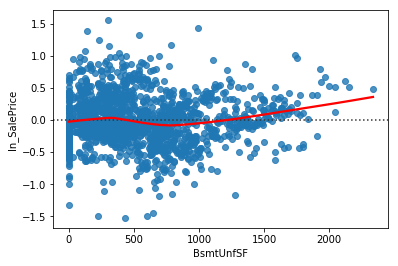

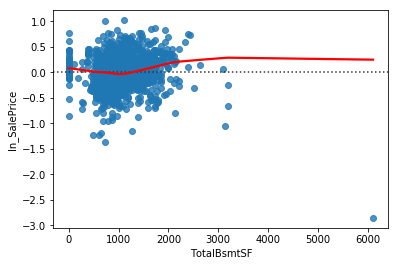

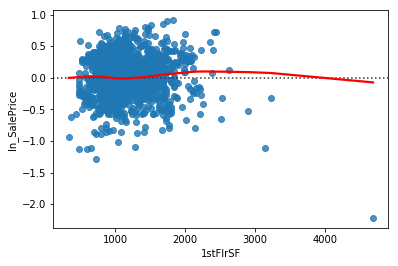

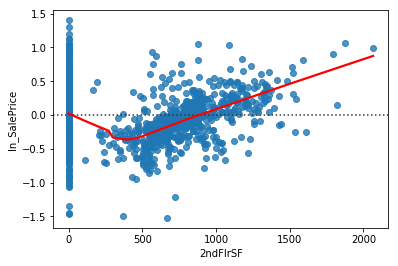

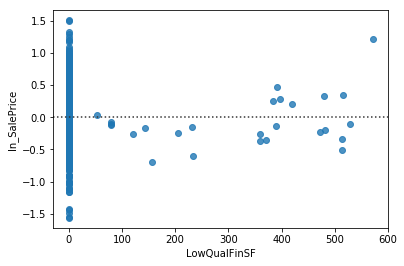

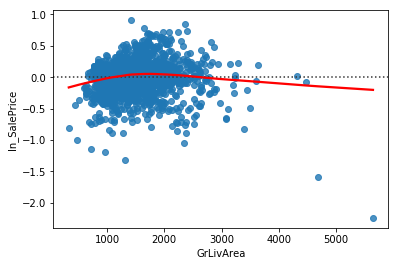

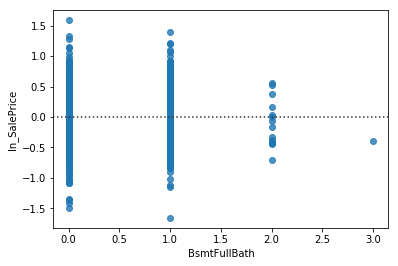

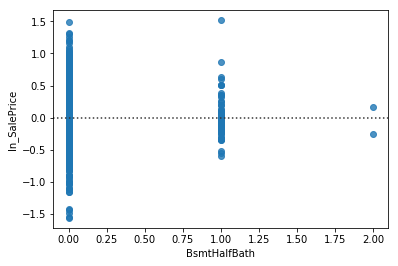

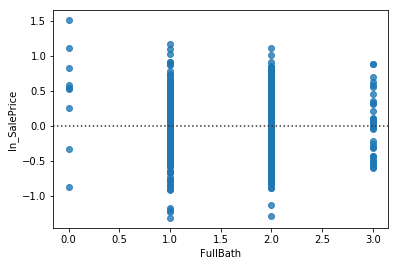

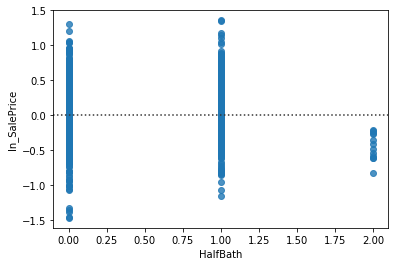

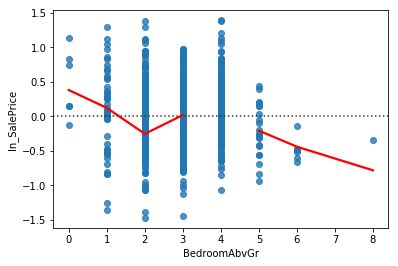

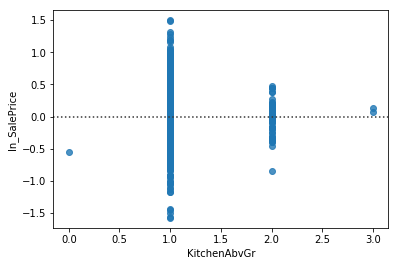

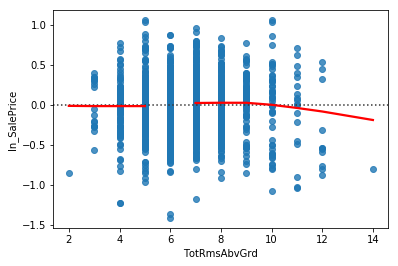

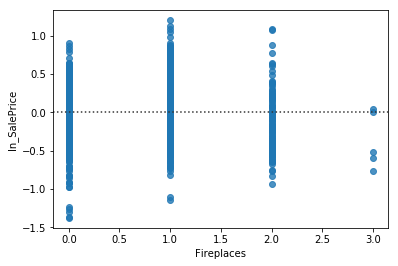

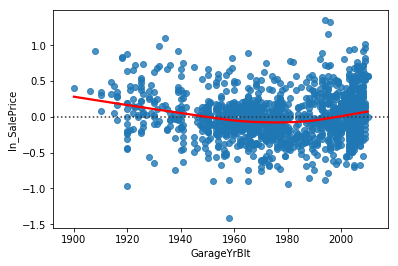

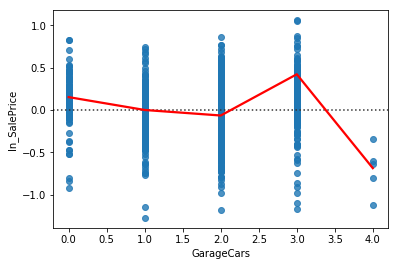

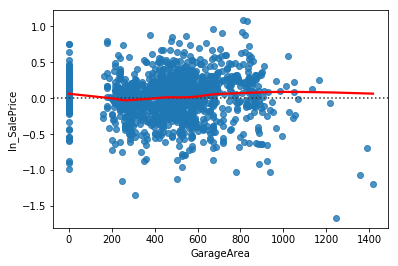

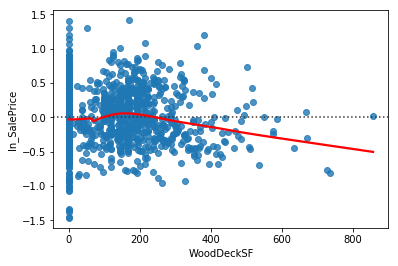

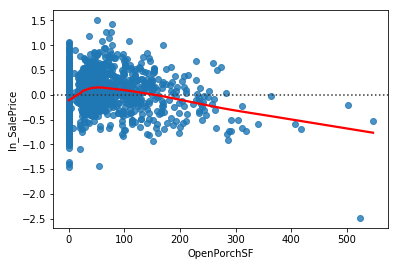

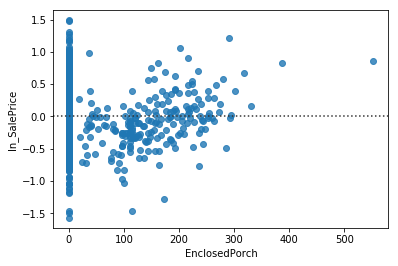

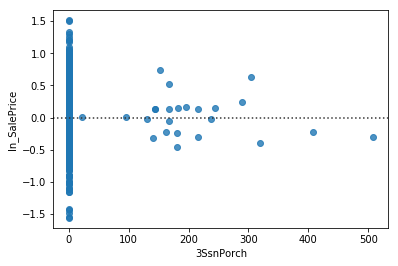

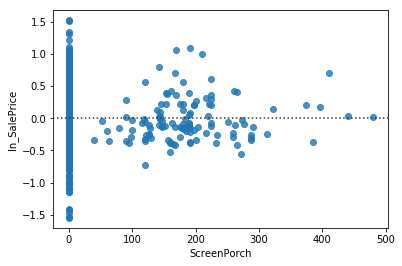

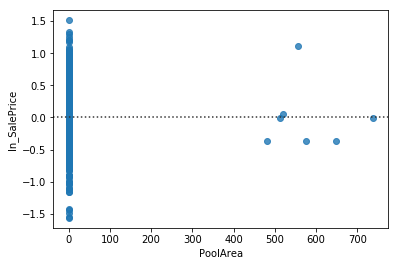

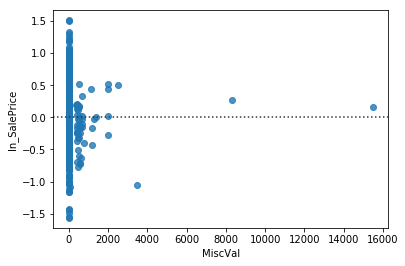

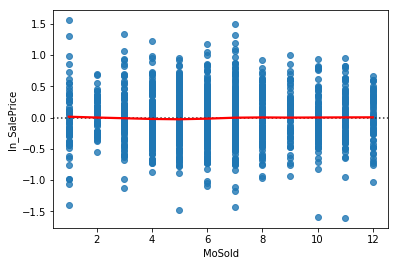

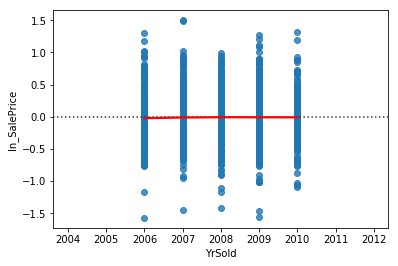

In [17]:
##### Your Code Here #####

for f in feature:
    sns.residplot(x=f, y=target, data=df2, lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [24]:
##### Your Code Here #####
# df2['GarageArea_squared'] = df2['GarageArea']**2
# df2['GarageCars_squared'] = df2['GarageCars']**2
# df2['Fireplaces_squared'] = df2['Fireplaces']**2
# df2['TotRmsAbvGrd_squared'] = df2['TotRmsAbvGrd']**2
# df2['GrLivArea_squared'] = df2['GrLivArea']**2
# df2['1stFlrSF_squared'] = df2['1stFlrSF']**2
# df2['TotalBsmtSF_squared'] = df2['TotalBsmtSF']**2
# df2['YearRemodAdd_squared'] = df2['YearRemodAdd']**2
# df2['YearBuilt_squared'] = df2['YearBuilt']**2

# X = df2[['GarageArea', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 
#         'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt']]
# y = df2['ln_SalePrice']


df['GarageArea_squared'] = df['GarageArea']**2
df['OverallQual_squared'] = df['OverallQual']**2
df['GrLivArea_squared'] = df['GrLivArea']**2
df['YearBuilt_squared'] = df['YearBuilt']**2

feature = ['LotArea','GrLivArea','GrLivArea_squared','OverallQual',
           'OverallQual_squared','YearBuilt','YearBuilt_squared',
           'GarageArea','GarageArea_squared']
target = 'ln_SalePrice'

X = df[feature] 
y = df[target]


model = sm.OLS(y, sm.add_constant(X))
results = model.fit(cov_type='HC3')
print(results.summary())

#Slight improvement on JB and R2
#Removed TotalBsmtSF improved JB

                            OLS Regression Results                            
Dep. Variable:           ln_SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     709.0
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:46:43   Log-Likelihood:                 624.34
No. Observations:                1400   AIC:                            -1229.
Df Residuals:                    1390   BIC:                            -1176.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -30.2915    

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.